In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Tablas

In [3]:
#Leemos y Cargamos el archivo xlsx
archivo_xlsx_path = './prepared_results/20240619_193506_Todos.xlsx'
df = pd.read_excel(archivo_xlsx_path)

In [36]:
#Creamos un DataFrame vacio para guardar los resultados seleccionados
datasets_list = list(df['dataset'].unique())
modelos_list = list(df['estimator_name'].unique())
columnas= ['dataset'] + modelos_list
df_final = pd.DataFrame(columns=columnas)
df_final.head()

,dataset,logisticat,logisticat_desb,logisticat_desb_v2,logisticit,logisticit_desb,logisticit_desb_v2,logisticregressor


In [12]:
media_mae = df.groupby(['dataset', 'estimator_name'])['MAE'].mean().reset_index()


In [13]:
media_mae.head()

,dataset,estimator_name,MAE
0,ERA,logisticat,1.223733
1,ERA,logisticat_desb,1.444000
2,ERA,logisticat_desb_v2,1.444000
3,ERA,logisticit,2.791600
4,ERA,logisticit_desb,2.819867


In [38]:
print("modelos=", modelos_list)
print("---------------\n")
for dataset in datasets_list:
    fila= [dataset]
    for modelo in modelos_list:
        #Generamos la instancia de df_final que tiene la forma (dataset, MAE_modelo1, ...., MAE_modeloN)
        mae= df[(df['dataset']==dataset) & (df['estimator_name']==modelo)]['MAE'].mean()
        fila.append(mae)
    df_final.loc[len(df_final)]= fila
    #print("fila=", fila)

#Eliminamos las filas con valores NaN
df_final = df_final.dropna()    

modelos= ['logisticat', 'logisticat_desb', 'logisticat_desb_v2', 'logisticit', 'logisticit_desb', 'logisticit_desb_v2', 'logisticregressor']
---------------



In [37]:
df_final.head()

,dataset,logisticat,logisticat_desb,logisticat_desb_v2,logisticit,logisticit_desb,logisticit_desb_v2,logisticregressor


In [40]:
print(df_final.to_latex(index=False))


\begin{tabular}{lrrrrrrr}
\toprule
dataset & logisticat & logisticat_desb & logisticat_desb_v2 & logisticit & logisticit_desb & logisticit_desb_v2 & logisticregressor \\
\midrule
ERA & 1.223733 & 1.444000 & 1.444000 & 2.791600 & 2.819867 & 2.819867 & 1.738133 \\
ESL & 0.308470 & 0.421038 & 0.421038 & 0.312842 & 0.626230 & 0.626230 & 0.396175 \\
LEV & 0.415467 & 0.571733 & 0.571733 & 0.422400 & 0.999467 & 0.999467 & 0.591467 \\
SWD & 0.448667 & 0.600667 & 0.600667 & 0.468800 & 1.024933 & 1.024933 & 0.588000 \\
automobile & 0.578205 & 0.656410 & 0.656410 & 0.694872 & 0.752564 & 0.752564 & 0.796154 \\
balance-scale & 0.152017 & 0.106794 & 0.106794 & 0.204246 & 0.106794 & 0.106794 & 0.106794 \\
car & 0.080015 & 0.081173 & 0.081173 & 0.083179 & 0.081096 & 0.081096 & 0.081636 \\
contact-lenses & 0.505556 & 0.466667 & 0.466667 & 0.533333 & 0.438889 & 0.438889 & 0.394444 \\
eucalyptus & 1.001993 & 1.017935 & 1.017935 & 0.989493 & 1.001087 & 1.001087 & 1.100000 \\
newthyroid & 0.030247 & 0.0388

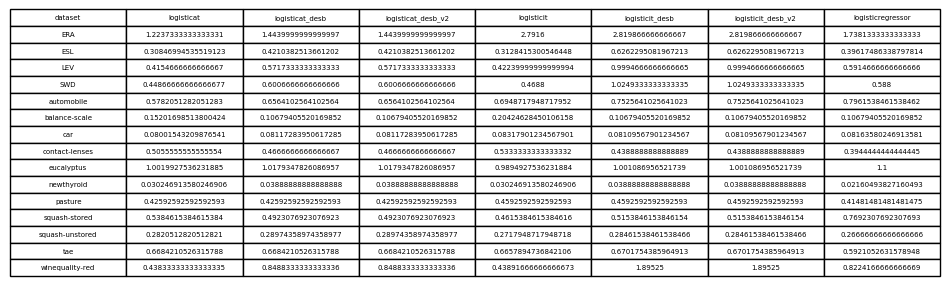

In [39]:
# Configura el tamaño de la figura para acomodar la tabla
fig, ax = plt.subplots(figsize=(12, 2))  # Ajusta el tamaño según sea necesario
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_final.values, colLabels=df_final.columns, cellLoc = 'center', loc='center')

plt.savefig('tabla_articulo.png', dpi=300)  # Guarda la imagen en alta resolución

In [41]:
df_v2= df_final.drop(columns=['logisticat_desb', "logisticit_desb"])
df_v2.head()

,dataset,logisticat,logisticat_desb_v2,logisticit,logisticit_desb_v2,logisticregressor
0,ERA,1.223733,1.444000,2.791600,2.819867,1.738133
1,ESL,0.308470,0.421038,0.312842,0.626230,0.396175
2,LEV,0.415467,0.571733,0.422400,0.999467,0.591467
3,SWD,0.448667,0.600667,0.468800,1.024933,0.588000
4,automobile,0.578205,0.656410,0.694872,0.752564,0.796154


In [42]:
print(df_v2.to_latex(index=False))


\begin{tabular}{lrrrrr}
\toprule
dataset & logisticat & logisticat_desb_v2 & logisticit & logisticit_desb_v2 & logisticregressor \\
\midrule
ERA & 1.223733 & 1.444000 & 2.791600 & 2.819867 & 1.738133 \\
ESL & 0.308470 & 0.421038 & 0.312842 & 0.626230 & 0.396175 \\
LEV & 0.415467 & 0.571733 & 0.422400 & 0.999467 & 0.591467 \\
SWD & 0.448667 & 0.600667 & 0.468800 & 1.024933 & 0.588000 \\
automobile & 0.578205 & 0.656410 & 0.694872 & 0.752564 & 0.796154 \\
balance-scale & 0.152017 & 0.106794 & 0.204246 & 0.106794 & 0.106794 \\
car & 0.080015 & 0.081173 & 0.083179 & 0.081096 & 0.081636 \\
contact-lenses & 0.505556 & 0.466667 & 0.533333 & 0.438889 & 0.394444 \\
eucalyptus & 1.001993 & 1.017935 & 0.989493 & 1.001087 & 1.100000 \\
newthyroid & 0.030247 & 0.038889 & 0.030247 & 0.038889 & 0.021605 \\
pasture & 0.425926 & 0.425926 & 0.459259 & 0.459259 & 0.414815 \\
squash-stored & 0.538462 & 0.492308 & 0.461538 & 0.515385 & 0.769231 \\
squash-unstored & 0.282051 & 0.289744 & 0.271795 & 0.284615

# Otro

In [14]:
David_results=  pd.read_csv('./David_results_MZE.csv')

#lo pasamos a dataframe de pandas
df_david = pd.DataFrame(David_results)

#cambiamos el nombre de las columnas logisticat y logisticat por logisticat_David y logisticat_David
df_david.columns = ['dataset', 'logisticat_David', 'logisticit_David']

df_david.head()

,dataset,logisticat_David,logisticit_David
0,ERA,0.745067,0.745067
1,ESL,0.452186,0.452186
2,LEV,0.531200,0.531200
3,SWD,0.570000,0.570000
4,automobile,0.553205,0.553205


In [15]:
TFM_results= pd.read_csv('./Tabla_comparativa_MZE_(GridconMZE).csv')

#lo pasamos a dataframe de pandas
df_TFM = pd.DataFrame(TFM_results)

df_TFM

,dataset,logisticat,logisticat_desb_v2,logisticit,logisticit_desb_v2,logisticregressor
0,ERA,0.731600,0.745067,0.895067,0.894800,0.790667
1,ESL,0.290710,0.452186,0.294262,0.492896,0.348087
2,LEV,0.381467,0.531200,0.389333,0.714400,0.492133
3,SWD,0.428133,0.570000,0.451600,0.763600,0.491200
4,automobile,0.498077,0.553205,0.566026,0.583333,0.496795
5,balance-scale,0.115499,0.094480,0.143312,0.094480,0.094480
6,car,0.079012,0.076852,0.081173,0.076775,0.066821
7,contact-lenses,0.344444,0.294444,0.388889,0.283333,0.250000
8,eucalyptus,0.679529,0.676993,0.659239,0.666848,0.667391
9,newthyroid,0.032099,0.036420,0.032099,0.036420,0.024691


In [16]:
#Unimos los dataframes segun la columna dataset
df_final = pd.merge(df_TFM, df_david, on='dataset')

df_final

,dataset,logisticat,logisticat_desb_v2,logisticit,logisticit_desb_v2,logisticregressor,logisticat_David,logisticit_David
0,ERA,0.731600,0.745067,0.895067,0.894800,0.790667,0.745067,0.745067
1,ESL,0.290710,0.452186,0.294262,0.492896,0.348087,0.452186,0.452186
2,LEV,0.381467,0.531200,0.389333,0.714400,0.492133,0.531200,0.531200
3,SWD,0.428133,0.570000,0.451600,0.763600,0.491200,0.570000,0.570000
4,automobile,0.498077,0.553205,0.566026,0.583333,0.496795,0.553205,0.553205
5,balance-scale,0.115499,0.094480,0.143312,0.094480,0.094480,0.094480,0.094480
6,car,0.079012,0.076852,0.081173,0.076775,0.066821,0.076852,0.076852
7,contact-lenses,0.344444,0.294444,0.388889,0.283333,0.250000,0.294444,0.294444
8,eucalyptus,0.679529,0.676993,0.659239,0.666848,0.667391,0.676993,0.676993
9,newthyroid,0.032099,0.036420,0.032099,0.036420,0.024691,0.036420,0.036420


In [17]:
# guarmados el resultado como un csv
df_final.to_csv('COMPARATIVA_MZE_con_David.csv', index=False)

In [18]:
mze= pd.read_csv('COMPARATIVA_MZE_con_David.csv')
amae= pd.read_csv('COMPARATIVA_AMAE_con_David.csv')

#los guardamos en un  xlsx donde cada hoja es un dataframe
with pd.ExcelWriter('COMPARATIVA_con_David.xlsx') as writer:
    mze.to_excel(writer, sheet_name='MZE', index=False)
    amae.to_excel(writer, sheet_name='AMAE', index=False)